In [73]:
#Assignment 2: Problems 1a, 1b, 2a, 2b, 3a, and 3b

In [97]:
#All Libraries needed to complete assingment are imported below

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [98]:
#Importing file from local directory

file_path = 'C:/Users/nicocorb/Downloads/ECGR4105/Housing.csv'
df = pd.read_csv(file_path)

In [99]:
df.head() #checking first 5 rows to verify my csv has imported correctly

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [100]:
m = len(df) #Retreiving number of rows
m

545

In [101]:
df.describe() #Taking a look at csv descriptions before processing

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [111]:
#Pre processing function to split parameters into proper arrays

#Defining scaling function to be used 
def scale_features(X, method='none'):
    if method == 'standardize':
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    elif method == 'normalize':
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
        scaler = None
    return X_scaled, scaler

#pre process function
def pre_processing(df, features, target, scale_method='none'):
    #retrieve copy so to not alter original data set
    df = df.copy()

    #one-hot encodeing 
    df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)

    #extract features and added bias turm for theta0
    X = df[features].values

    #Apply scaling if necessary and then adding bias
    X, scaler = scale_features(X, method=scale_method)
    X = np.column_stack((np.ones((X.shape[0], 1)), X))

    #extract target as column vector
    y = df[target].values.reshape(-1, 1)

    #split data into training and test sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val, scaler

In [112]:
#Cost and gradient descent functions to be used for processing machine learning data

#Computing cost function for linear regression
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    sqr_errors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqr_errors)
    return J

#Defining the gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [113]:
#Now I can use a train and plot function to complete the process w/ out normalization

#Train and plot function
def train_model_and_plot(df, features, target, alpha=0.01, iterations=1000, scale_method='none'):
    #Run preprocessing
    X_train, X_val, y_train, y_val, scaler = pre_processing(df, features, target, scale_method=scale_method)

    #Initialize theta and train
    theta = np.zeros((X_train.shape[1], 1))
    theta, train_loss = gradient_descent(X_train, y_train, theta, alpha, iterations)

    #Validation loss calculation
    val_loss = []
    for i in range(iterations):
        val_loss.append(compute_cost(X_val, y_val, theta))

    #Plotting
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_loss, label="Training Loss", color="blue")
    plt.plot(range(iterations), val_loss, label="Validation Loss", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return theta

Problem 1a


C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:7: RuntimeWarning: overflow encountered in square
  sqr_errors = np.square(errors)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:18: RuntimeWarning: overflow encountered in dot
  sum_delta = (alpha / m) * X.transpose().dot(errors)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:5: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:16: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)


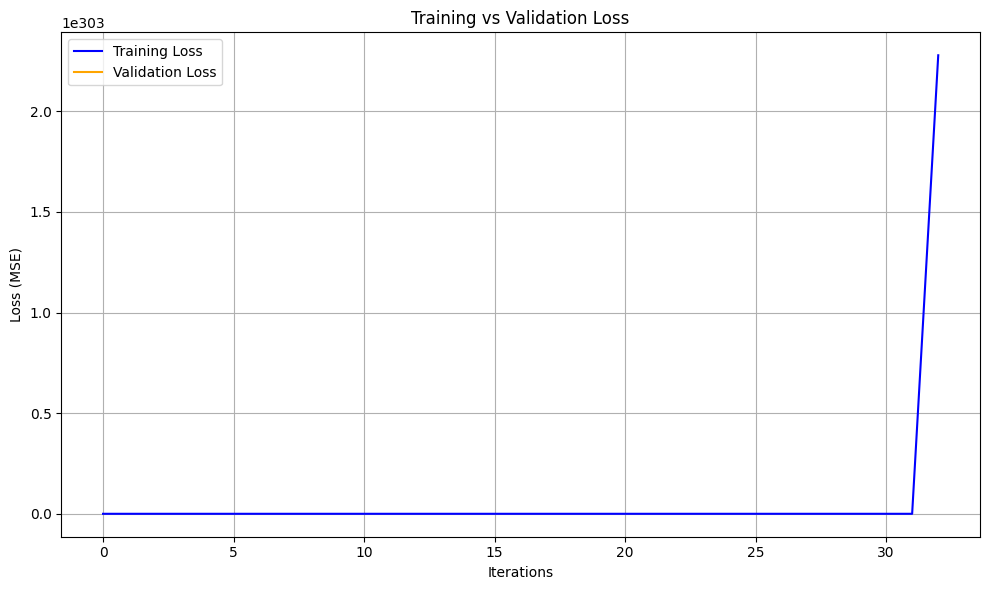

In [114]:
#Problem 1a solution
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 1a')

theta1a = train_model_and_plot(df, features, target, alpha=0.001, iterations=1000, scale_method='none')

Problem 1b


C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:7: RuntimeWarning: overflow encountered in square
  sqr_errors = np.square(errors)
C:\Users\nicocorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:18: RuntimeWarning: overflow encountered in dot
  sum_delta = (alpha / m) * X.transpose().dot(errors)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:5: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:16: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)


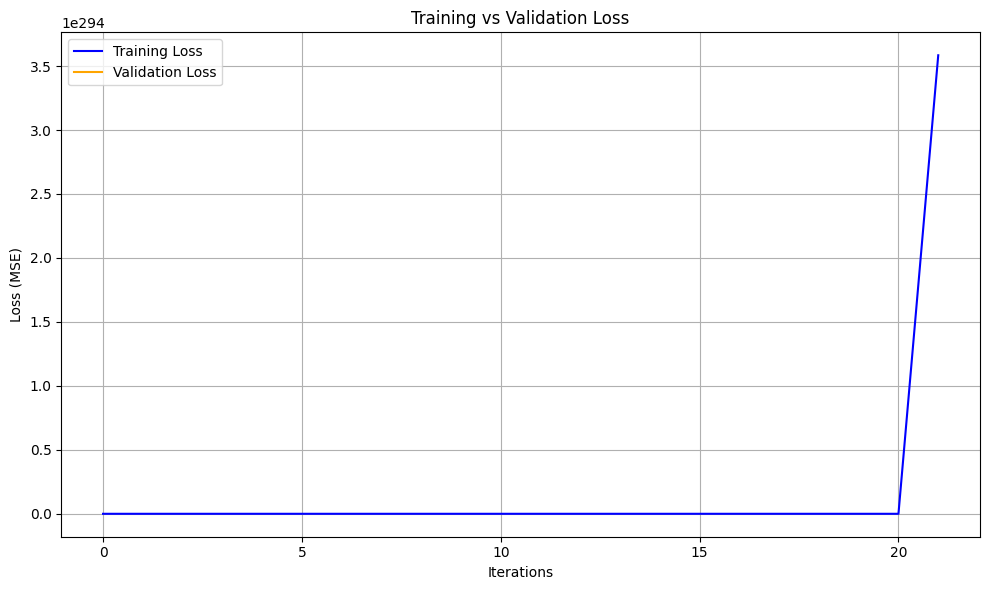

In [115]:
#Problem 1b solution
features1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

print('Problem 1b')

#encoding all objects
df_encoded = pd.get_dummies(df, drop_first=True)

theta1b = train_model_and_plot(df_encoded, features1b, target, alpha=0.1, iterations=1000, scale_method='none')

In [116]:
#Problem 2

Problem 2a


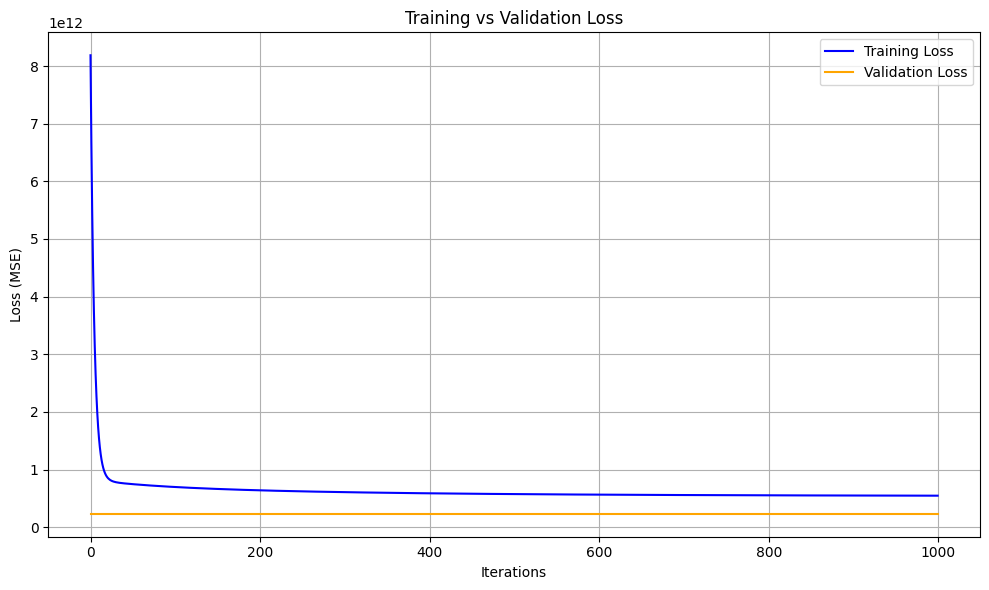

In [125]:
#Problem 2a solution for normalization
features2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 2a')

theta1a = train_model_and_plot(df, features2b, target, alpha=0.1, iterations=1000, scale_method='normalize')

Problem 2b


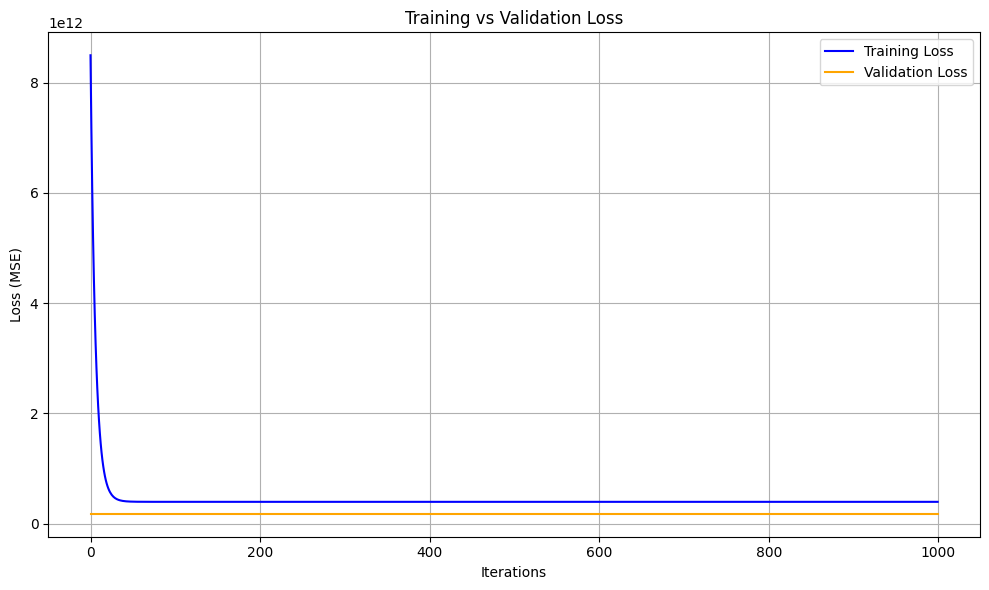

In [132]:
#Problem 2b solution for standardization
features2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

print('Problem 2b')

#encoding all objects
df_encoded = pd.get_dummies(df, drop_first=True)

theta1b = train_model_and_plot(df_encoded, features2b, target, alpha=0.1, iterations=1000, scale_method='standardize')

In [134]:
#Updating gradient descent function and plotting function to incorporate lambda for regularization

#Updated gradient descent function
def gradient_descent_2(X, y, theta, alpha, iterations, lambda_):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y

        # Regularization term (don't regularize bias term θ₀)
        reg_term = (lambda_ / m) * np.copy(theta)
        reg_term[0] = 0  # no regularization for bias term

        gradient = (1 / m) * (X.T.dot(errors)) + reg_term
        theta -= alpha * gradient

        # Note: for evaluation set, do not include the regularization term in cost
        cost = (1 / (2 * m)) * np.sum(np.square(errors))
        cost_history.append(cost)

    return theta, cost_history

#Updated plot function
def train_model_and_plot_2(df, features, target, scale_method='standardize', alpha=0.01, iterations=1000, lambda_=0.1):
    X_train, X_val, y_train, y_val, _ = pre_processing(df, features, target, scale_method)

    theta = np.zeros((X_train.shape[1], 1))
    theta, train_loss = gradient_descent_l2(X_train, y_train, theta, alpha, iterations, lambda_)

    val_loss = [compute_cost(X_val, y_val, theta)] * iterations  # eval cost without regularization

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, '--', label="Validation Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Problem 3 - L2 Regularization ({scale_method})")
    plt.legend()
    plt.grid(True)
    plt.show()

    return theta

In [135]:
#Probelem 3

In [ ]:
#Problem 3a solution for normalization
features2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 2a')

theta1a = train_model_and_plot(df, features2b, target, alpha=0.1, iterations=1000, scale_method='normalize')